In [13]:
import pandas as pd
import numpy as np

from sklearn.metrics import mean_absolute_error as mea

from fbprophet import Prophet

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = 'https://raw.githubusercontent.com/dataworkshop/5dwchallenge_2019/master/challenge5/input/mauna_loa.csv'
df = pd.read_csv(path)

df.head()

,year,month,day,decimal,ppm,#days,1 yr ago,10 yr ago,since 1800
0,1974,5,19,1974.3795,333.34,6,-999.99,-999.99,50.36
1,1974,5,26,1974.3986,332.95,6,-999.99,-999.99,50.06
2,1974,6,2,1974.4178,332.32,5,-999.99,-999.99,49.57
3,1974,6,9,1974.4370,332.18,7,-999.99,-999.99,49.63
4,1974,6,16,1974.4562,332.37,7,-999.99,-999.99,50.07


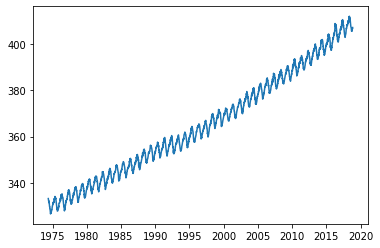

In [11]:
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

df['ppm_fixed'] = df['ppm'].map(lambda x: np.nan if x<0 else x)
df['ppm_fixed'].fillna(method='backfill', inplace=True)
plt.plot(df.date, df.ppm_fixed);

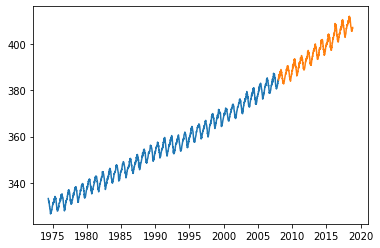

In [32]:
cut_year = 2008

train = df[df.year < cut_year]
test = df[ df.year >= cut_year ]

plt.plot(train.date, train.ppm_fixed, label='train');
plt.plot(test.date, test.ppm_fixed, label = 'test');

# Prophet

In [33]:
fb_df = train[ ['date', 'ppm_fixed']].copy()
fb_df.columns = ['ds', 'y']

fb_df.head()

,ds,y
1974-05-19,1974-05-19,333.34
1974-05-26,1974-05-26,332.95
1974-06-02,1974-06-02,332.32
1974-06-09,1974-06-09,332.18
1974-06-16,1974-06-16,332.37


In [34]:
m = Prophet()

m.fit(fb_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [35]:
future = m.make_future_dataframe(periods=len(test), freq='W', include_history=False)
future.tail()

,ds
561,2018-10-07
562,2018-10-14
563,2018-10-21
564,2018-10-28
565,2018-11-04


In [36]:
test.tail()

,year,month,day,decimal,ppm,#days,1 yr ago,10 yr ago,since 1800,ppm_fixed,date
2018-10-07,2018,10,7,2018.7658,405.58,7,403.38,382.78,129.25,405.58,2018-10-07
2018-10-14,2018,10,14,2018.7849,406.00,6,403.81,382.92,129.45,406.00,2018-10-14
2018-10-21,2018,10,21,2018.8041,406.62,7,404.04,383.04,129.77,406.62,2018-10-21
2018-10-28,2018,10,28,2018.8233,406.48,6,404.07,383.96,129.29,406.48,2018-10-28
2018-11-04,2018,11,4,2018.8425,406.99,5,404.26,383.80,129.43,406.99,2018-11-04


In [37]:
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2008-01-06,385.042087,384.392689,385.409349,385.042087,385.042087,-0.119006,-0.119006,-0.119006,-0.119006,-0.119006,-0.119006,0.0,0.0,0.0,384.923081
1,2008-01-13,385.082520,384.600553,385.647027,385.082520,385.082520,0.055229,0.055229,0.055229,0.055229,0.055229,0.055229,0.0,0.0,0.0,385.137750
2,2008-01-20,385.122954,384.873977,385.830337,385.122954,385.122954,0.224589,0.224589,0.224589,0.224589,0.224589,0.224589,0.0,0.0,0.0,385.347543
3,2008-01-27,385.163387,385.033282,386.065239,385.163387,385.163387,0.384762,0.384762,0.384762,0.384762,0.384762,0.384762,0.0,0.0,0.0,385.548149
4,2008-02-03,385.203821,385.199274,386.252058,385.203821,385.203821,0.532006,0.532006,0.532006,0.532006,0.532006,0.532006,0.0,0.0,0.0,385.735827


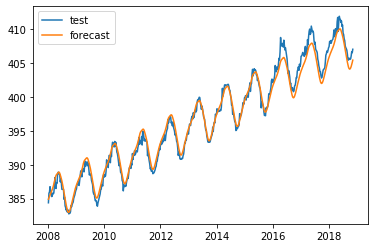

In [38]:
train = df[df.year < cut_year]
test = df[ df.year >= cut_year ]

#plt.plot(train.date, train.ppm_fixed, label='train');
plt.plot(test.date, test.ppm_fixed, label = 'test');
plt.plot(test.date, forecast.yhat, label = 'forecast');
plt.legend();


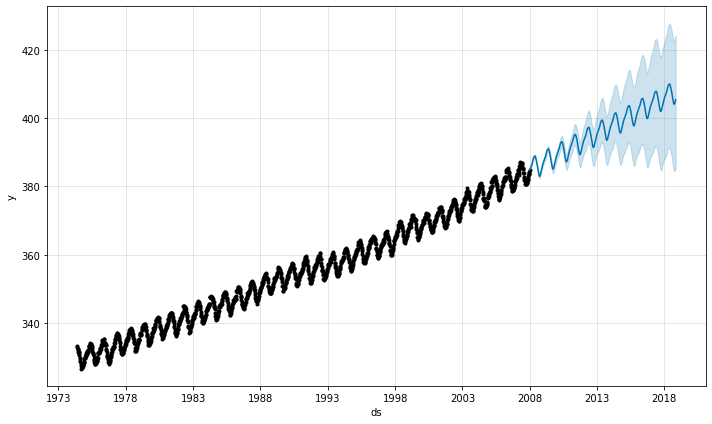

In [40]:
m.plot(forecast);